## **Análisis exploratorio de los datos**

In [3]:
#Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Para calsificación
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans


In [4]:
ventas_df = pd.read_csv('ventas_hw.csv')

In [5]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220412 entries, 0 to 220411
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Codigo        220412 non-null  int64  
 1   SKU           220412 non-null  object 
 2   Cantidad      220412 non-null  int64  
 3   v.Importe     220412 non-null  float64
 4   FechaArchivo  220412 non-null  object 
 5   ItemName      219726 non-null  object 
 6   Categoria     219726 non-null  object 
 7   Familia       219726 non-null  object 
 8   Uso           219726 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 15.1+ MB


las columnas de "ItemName", "Categoría", "Familia", "Uso" tiene menos valores que las demás que tiene 220412 filas lo cual sugiere que posiblemente tiene valores nulos.

In [6]:
ventas_df.tail()

,Codigo,SKU,Cantidad,v.Importe,FechaArchivo,ItemName,Categoria,Familia,Uso
220407,746,HUASMWFIT2RJO,1,0.000000,2022-06-20,SMARTWATCH HUAWEI FIT NEW ROJO,TECNOLOGIA,NUEVO,WEARABLES
220408,746,HUASMWFTELENGO,2,448.245624,2022-06-20,SMARTWATCH HUAWEI FIT ELEGANT NEGRO,TECNOLOGIA,BLUETOOTH,WEARABLES
220409,746,SERV-0000,0,378.735392,2022-06-20,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION
220410,746,THUANVA9SEAZL,1,907.487539,2022-06-20,TELEFONO CELULAR HUAWEI NOVA 9SE AZUL,HUAWEI,NUEVO,TELEFONO
220411,746,THUAY9APLTA,1,587.160807,2022-06-20,TELEFONO CELULAR HUAWEI Y9A PLATA,HUAWEI,NUEVO,TELEFONO


Se puede ver que la columna de FechaArchivo tiene la fecha pero tenemos el tipo de dato como objeto. Extraeremos la fecha.

In [7]:
ventas_df['FechaArchivo'] = pd.to_datetime(ventas_df['FechaArchivo'])
ventas_df

,Codigo,SKU,Cantidad,v.Importe,FechaArchivo,ItemName,Categoria,Familia,Uso
0,710,HUAAUDBTFRBDSLTBCO,2,0.000000,2021-01-01,AUDIFONOS BLUETOOTH HUAWEI FREEBUDS LITE BLANCO,AUDIO,NUEVO,AUDIFONOS
1,710,HUASMWGT2SPORTNGO,1,373.608827,2021-01-01,SMARTWATCH HUAWEI GT 2 SPORT NEGRO,TECNOLOGIA,NUEVO,WEARABLES
2,710,HUATBTM5LIT64G,1,640.548183,2021-01-01,TABLETA HUAWEI M5 LITE WIFI 64G GRIS,HUAWEI,NUEVO,TABLET
3,710,HUATBTMTEPD10.464,1,683.258827,2021-01-01,TABLET HUAWEI MATEPAD 10 4 64GB,HUAWEI,NUEVO,TABLET
4,710,SERV-0000,0,1316.484407,2021-01-01,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION
...,...,...,...,...,...,...,...,...,...
220407,746,HUASMWFIT2RJO,1,0.000000,2022-06-20,SMARTWATCH HUAWEI FIT NEW ROJO,TECNOLOGIA,NUEVO,WEARABLES
220408,746,HUASMWFTELENGO,2,448.245624,2022-06-20,SMARTWATCH HUAWEI FIT ELEGANT NEGRO,TECNOLOGIA,BLUETOOTH,WEARABLES
220409,746,SERV-0000,0,378.735392,2022-06-20,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION
220410,746,THUANVA9SEAZL,1,907.487539,2022-06-20,TELEFONO CELULAR HUAWEI NOVA 9SE AZUL,HUAWEI,NUEVO,TELEFONO


In [8]:
ventas_df['anio'] = ventas_df['FechaArchivo'].dt.year
ventas_df['mes'] = ventas_df['FechaArchivo'].dt.month_name()
ventas_df['dia'] = ventas_df['FechaArchivo'].dt.day
ventas_df['diasemana'] = ventas_df['FechaArchivo'].dt.day_name()
ventas_df.drop('FechaArchivo', axis=1, inplace=True)
ventas_df

,Codigo,SKU,Cantidad,v.Importe,ItemName,Categoria,Familia,Uso,anio,mes,dia,diasemana
0,710,HUAAUDBTFRBDSLTBCO,2,0.000000,AUDIFONOS BLUETOOTH HUAWEI FREEBUDS LITE BLANCO,AUDIO,NUEVO,AUDIFONOS,2021,January,1,Friday
1,710,HUASMWGT2SPORTNGO,1,373.608827,SMARTWATCH HUAWEI GT 2 SPORT NEGRO,TECNOLOGIA,NUEVO,WEARABLES,2021,January,1,Friday
2,710,HUATBTM5LIT64G,1,640.548183,TABLETA HUAWEI M5 LITE WIFI 64G GRIS,HUAWEI,NUEVO,TABLET,2021,January,1,Friday
3,710,HUATBTMTEPD10.464,1,683.258827,TABLET HUAWEI MATEPAD 10 4 64GB,HUAWEI,NUEVO,TABLET,2021,January,1,Friday
4,710,SERV-0000,0,1316.484407,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2021,January,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
220407,746,HUASMWFIT2RJO,1,0.000000,SMARTWATCH HUAWEI FIT NEW ROJO,TECNOLOGIA,NUEVO,WEARABLES,2022,June,20,Monday
220408,746,HUASMWFTELENGO,2,448.245624,SMARTWATCH HUAWEI FIT ELEGANT NEGRO,TECNOLOGIA,BLUETOOTH,WEARABLES,2022,June,20,Monday
220409,746,SERV-0000,0,378.735392,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2022,June,20,Monday
220410,746,THUANVA9SEAZL,1,907.487539,TELEFONO CELULAR HUAWEI NOVA 9SE AZUL,HUAWEI,NUEVO,TELEFONO,2022,June,20,Monday


Teniendo ya las fecha separada para facilitar los procesos posteriores. Pasamos aver los valores unicos de cada columna.

In [9]:
ventas_df.nunique()

Codigo          37
SKU            687
Cantidad        64
v.Importe    16254
ItemName       676
Categoria        7
Familia         24
Uso             34
anio             2
mes             12
dia             31
diasemana        7
dtype: int64

No tenemos ninguna columna con valor unico por lo que podemos seguir con el mismo dataframe para los siguientes pasos.

In [10]:
ventas_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Codigo,220412.0,723.748757,11.002375,710.000000,716.000000,722.000000,729.000000,810.000000
Cantidad,220412.0,1.398182,2.208783,-3.000000,1.000000,1.000000,2.000000,650.000000
v.Importe,220412.0,561.474674,917.699923,-4270.928134,31.819634,234.677542,640.548183,69334.905693
anio,220412.0,2021.322582,0.467465,2021.000000,2021.000000,2021.000000,2022.000000,2022.000000
dia,220412.0,15.645868,8.616805,1.000000,8.000000,15.000000,23.000000,31.000000


In [11]:
ventas_df.describe(include='object').T

,count,unique,top,freq
SKU,220412,687,ATTSIMTRIOIUS100HUA,10735
ItemName,219726,676,SIM CARD TRIO AT T IUSACELL 100 PESOS HUAWEI,10735
Categoria,219726,7,TECNOLOGIA,61452
Familia,219726,24,NUEVO,148186
Uso,219726,34,WEARABLES,57791
mes,220412,12,May,25388
diasemana,220412,7,Sunday,40123


- Se nota que mayormente tenemos venta de simcards.
- Existen 7 categorías de productos.
- se analizarán años y semanas completas comparables entres los datos.

In [12]:
columnas_numericas = ventas_df.select_dtypes(include=np.number).columns.tolist()
columnas_categoricas = ventas_df.select_dtypes(exclude=np.number).columns.tolist()

Recuento por cada categoria.

In [13]:
for columna in columnas_categoricas:
    print(ventas_df[columna].value_counts())
    print('-' * 100)

SKU
ATTSIMTRIOIUS100HUA    10735
SERV-0000               9689
HUASMWBAND6NGO          5305
HUASWMBAND6RSA          4895
HUACBLTIPCBCO1M         4777
                       ...  
POPSUJCELIRONRJO           1
HUATBTT51064G              1
POPSUJCELACTROSA           1
DEMHUAAUDFREE4IPLT         1
HUAGAREXT12MMTEPDCD        1
Name: count, Length: 687, dtype: int64
----------------------------------------------------------------------------------------------------
ItemName
SIM CARD TRIO AT T IUSACELL  100 PESOS   HUAWEI       10735
ARTICULO DE SERVICIO                                   9689
PULSERA INTELIGENTE HUAWEI BAND 6 NEGRO                5305
PULSERA INTELIGENTE HUAWEI BAND 6 ROSA                 4895
CABLE HUAWEI TIPO C BLANCO 1M                          4777
                                                      ...  
DEMO PULSERA INTELIGENTE HUAWEI BAND 3E PRO AZUL          1
DEMO MINI PARLANTE BLUETOOTH CM510 DUO NEGRO              1
AUDIFONOS BLUETOOTH HUAWEI SPORT ROJO           

Comprobamos los valores faltantes por columna.

In [14]:
ventas_df.isna().sum()

Codigo         0
SKU            0
Cantidad       0
v.Importe      0
ItemName     686
Categoria    686
Familia      686
Uso          686
anio           0
mes            0
dia            0
diasemana      0
dtype: int64

In [15]:
ventas_df.loc[ventas_df['ItemName'].isnull()]


,Codigo,SKU,Cantidad,v.Importe,ItemName,Categoria,Familia,Uso,anio,mes,dia,diasemana
2333,727,DEMAUDINAFRLANJA,1,95.991500,NaN,NaN,NaN,NaN,2021,January,10,Sunday
2527,727,DEMAUDINAFRLANJA,-1,-95.991500,NaN,NaN,NaN,NaN,2021,January,11,Monday
3173,711,THUAY5NEOCAFE,1,234.800163,NaN,NaN,NaN,NaN,2021,January,15,Friday
3890,711,THUAY5NEOCAFE,1,234.800163,NaN,NaN,NaN,NaN,2021,January,18,Monday
4284,711,THUAY5NEOCAFE,1,234.800163,NaN,NaN,NaN,NaN,2021,January,20,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
220299,732,HUAFREEBDSSEBLANCO,1,106.669471,NaN,NaN,NaN,NaN,2022,June,20,Monday
220305,733,HUAFREEBDSSEBLANCO,3,320.007173,NaN,NaN,NaN,NaN,2022,June,20,Monday
220333,736,HUAFREEBDSSEBLANCO,1,106.669471,NaN,NaN,NaN,NaN,2022,June,20,Monday
220355,739,HUAFREEBDSSEBLANCO,1,106.669471,NaN,NaN,NaN,NaN,2022,June,20,Monday


Tenemos ventas asignadas sin clasificación de categoría, itemcode y familia.

In [16]:
ventas_df['Categoria'].isna().mean() * 100

0.31123532294067474

Los valores faltantes menos del 1%  de la muestra.

## **Análisis univariado**

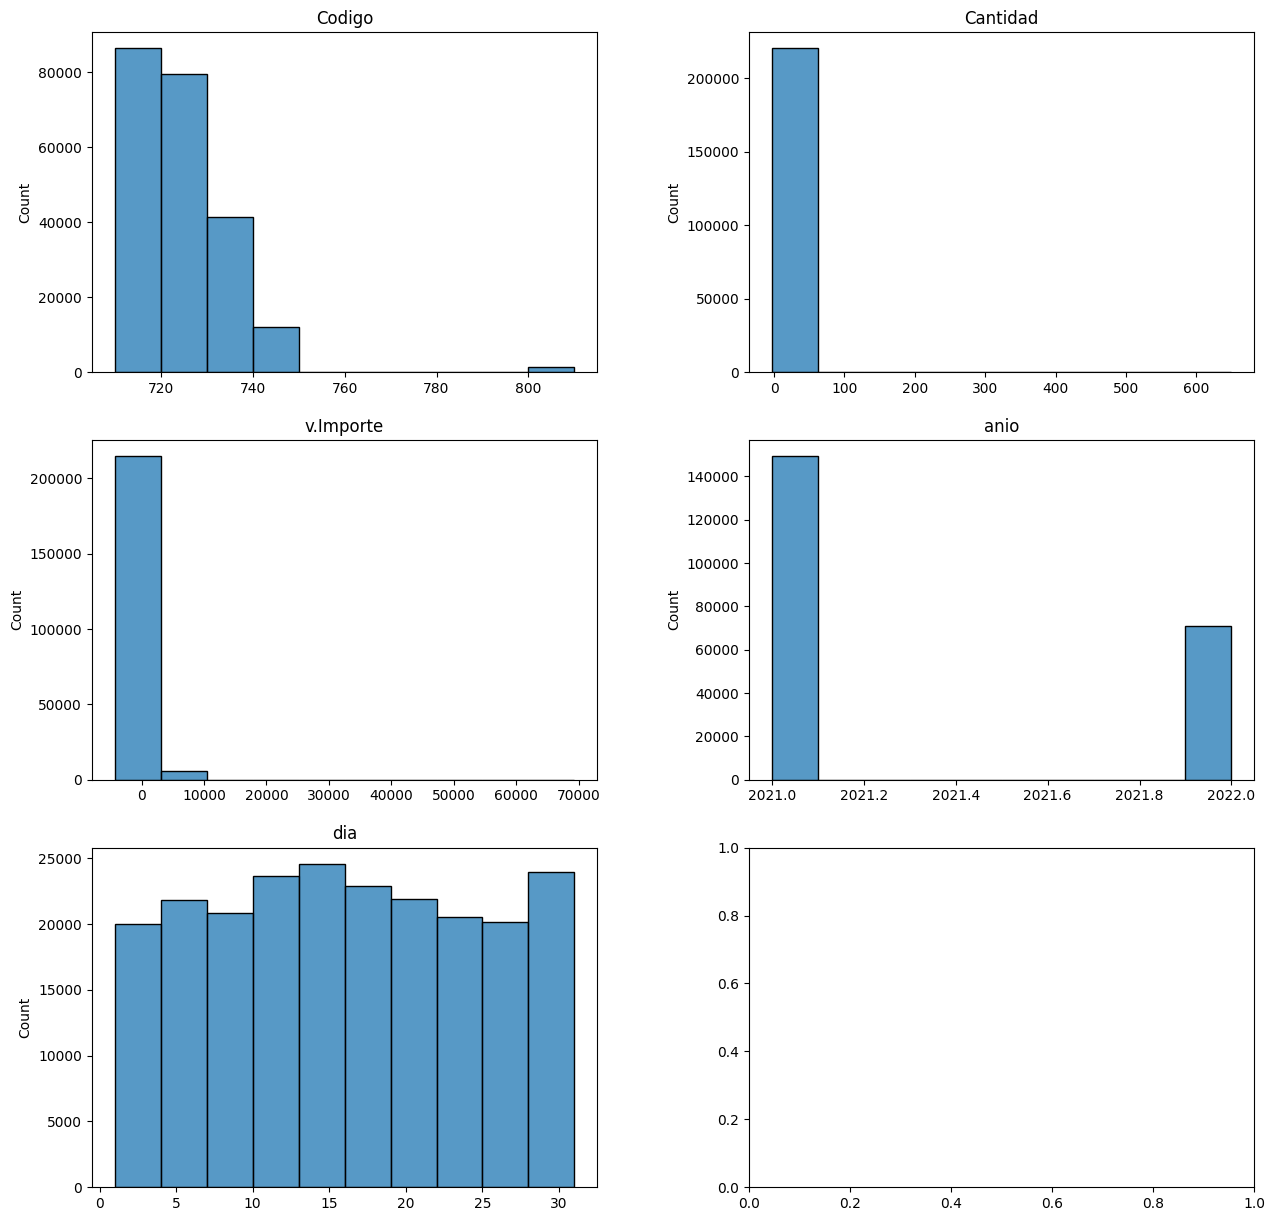

In [17]:
fig, axes = plt.subplots(3,2, figsize=(15,15)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(ventas_df[columnas_numericas], axes):
  sns.histplot(x=ventas_df[col], ax=ax, bins=10) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib

**Codigo**
- Posiblemente se refiere a los codigo de los productos, si bien es numérica el tipo de dato, no podemos extraer mucha información de esta forma.

**Cantidad**

- La cantidad no se encuentra mayor a 100 por lo que posiblemente estamos viendo las ventas a menudeo y no mayoreo.

**Importe**

- De igual forma vemos el importe por lo que pudiera ser cada venta, las caules e encuentras entre los negativos y menores a $10,000 por lo que refuerza lo anterior que es menudeo y aprte podemos asumir que hay devoluciones.

**dias**

- parece tener ligera tendencia por días en el mes la venta.

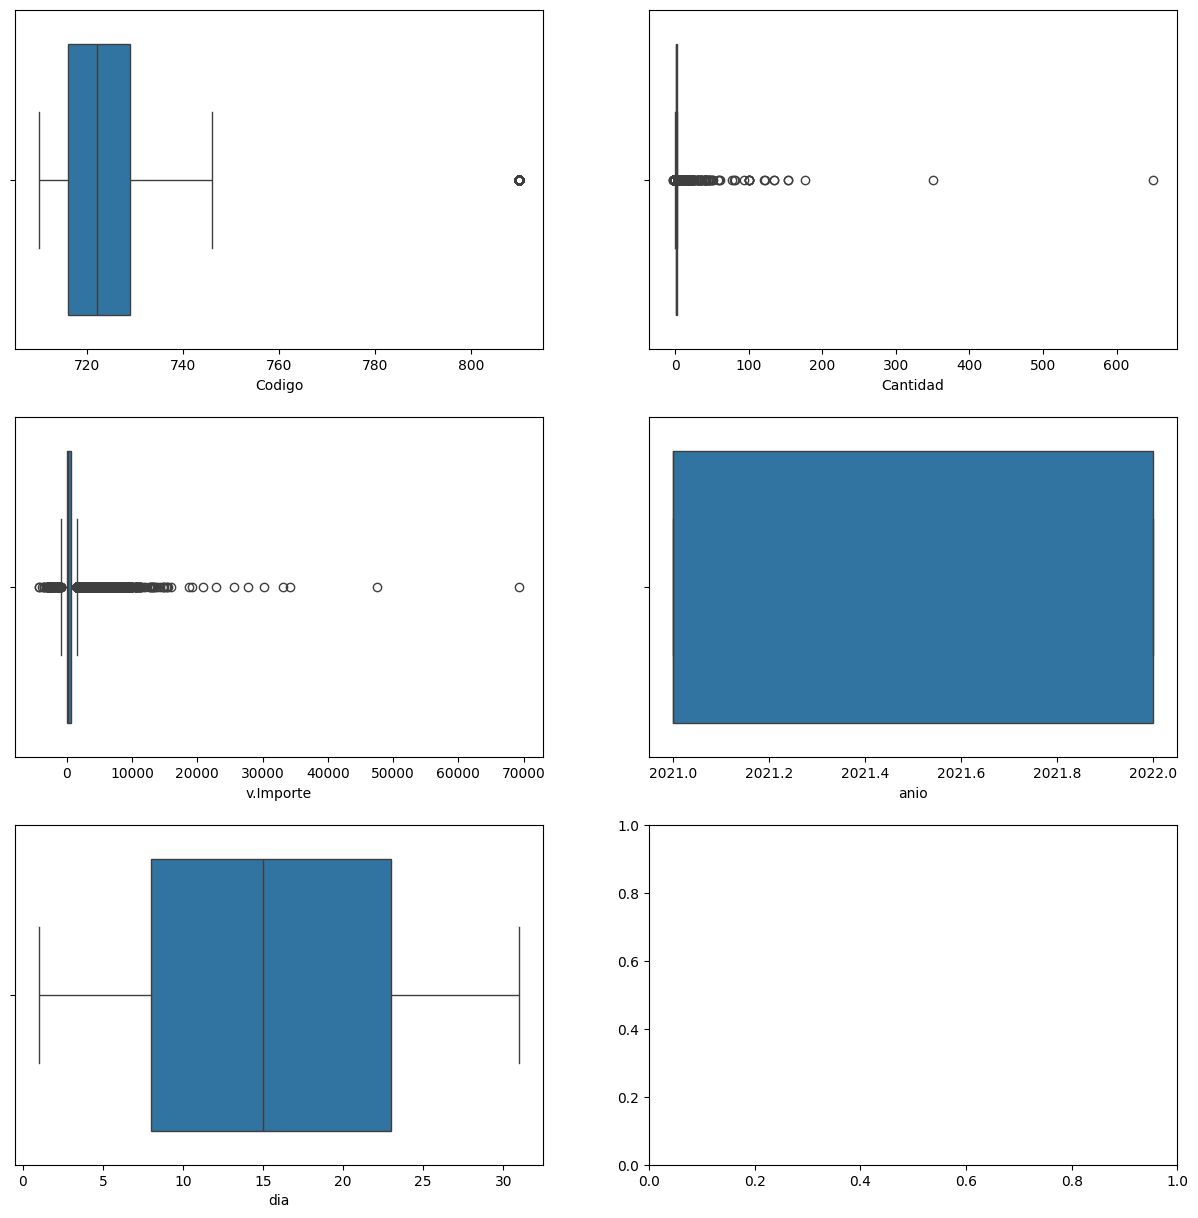

In [18]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(ventas_df[columnas_numericas], axes):
  sns.boxplot(x=ventas_df[col], ax=ax) # ---> Seaborn
  ax.set(xlabel=f'{col}')

Vemos que tanto en cantidad como importe tenemos presencia de outliers. Puede ser que no se este solo analizando a menudeo y se tenga alguna de mayoreo en los datos.

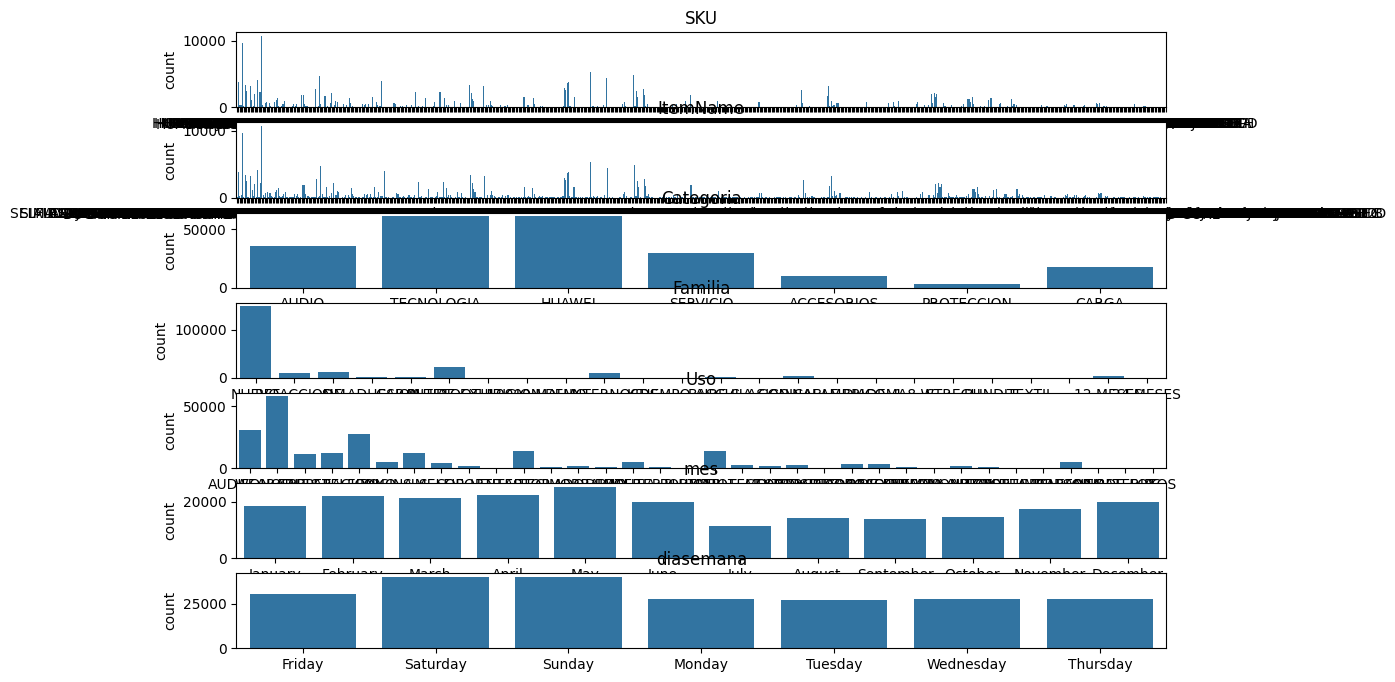

In [19]:
fig, axes = plt.subplots(7,1, figsize=(12,8))
axes = axes.ravel()
for col, ax in zip(ventas_df[columnas_categoricas], axes):
  sns.countplot(x=ventas_df[col], ax=ax) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None)

- Se vuelve muy dificil de analizar por categoricas debido a la presencia de muchos elementos.

<Axes: xlabel='dia', ylabel='Cantidad'>

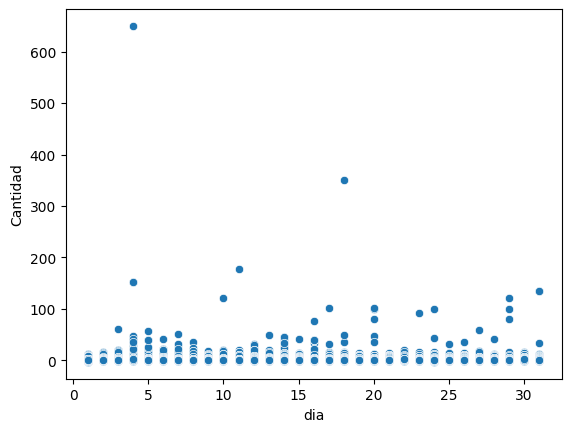

In [20]:
sns.scatterplot(y=ventas_df['Cantidad'], x=ventas_df['dia'])

<Axes: xlabel='dia', ylabel='v.Importe'>

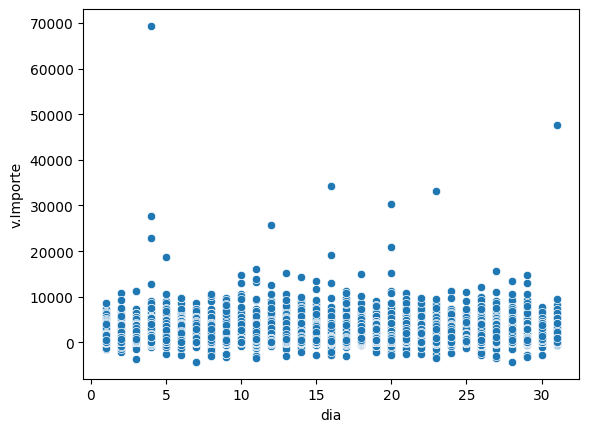

In [21]:
sns.scatterplot(y=ventas_df['v.Importe'], x=ventas_df['dia'])

<Axes: xlabel='anio', ylabel='Cantidad'>

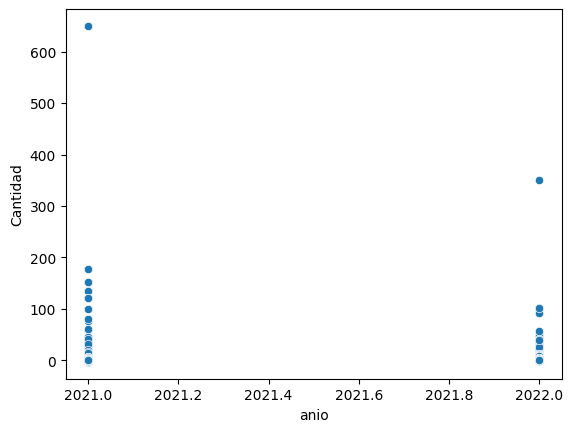

In [22]:
sns.scatterplot(y=ventas_df['Cantidad'], x=ventas_df['anio'])

<Axes: xlabel='diasemana', ylabel='Cantidad'>

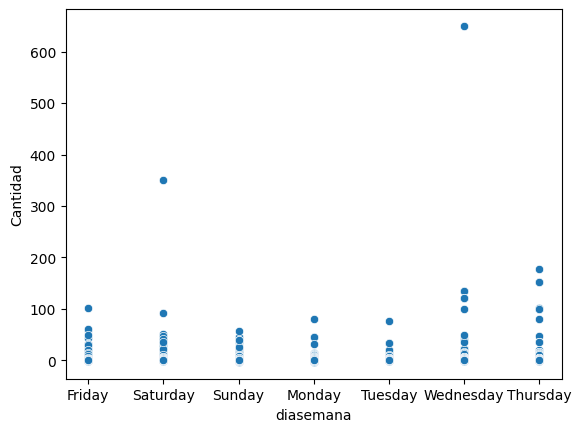

In [23]:
sns.scatterplot(y=ventas_df['Cantidad'], x=ventas_df['diasemana'])

<Axes: xlabel='diasemana', ylabel='v.Importe'>

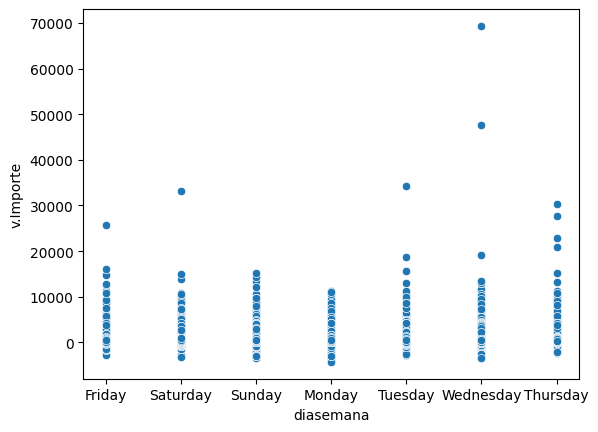

In [24]:
sns.scatterplot(y=ventas_df['v.Importe'], x=ventas_df['diasemana'])

<Axes: xlabel='Categoria', ylabel='v.Importe'>

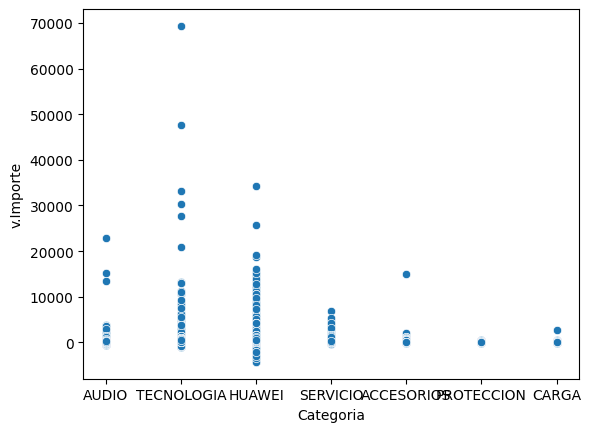

In [25]:
sns.scatterplot(y=ventas_df['v.Importe'], x=ventas_df['Categoria'])

<Axes: xlabel='Categoria', ylabel='v.Importe'>

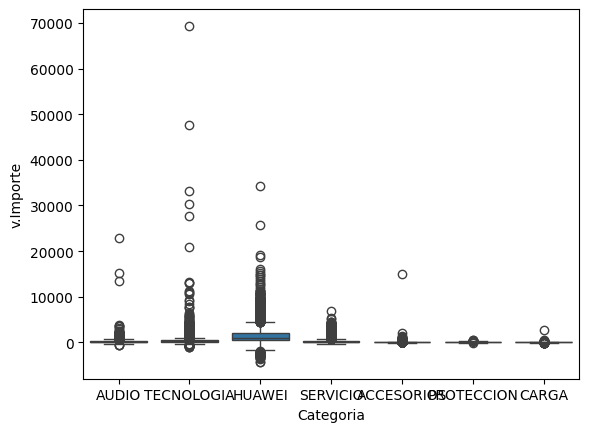

In [26]:
sns.boxplot( x='Categoria', y='v.Importe', data=ventas_df)

<Axes: xlabel='diasemana', ylabel='v.Importe'>

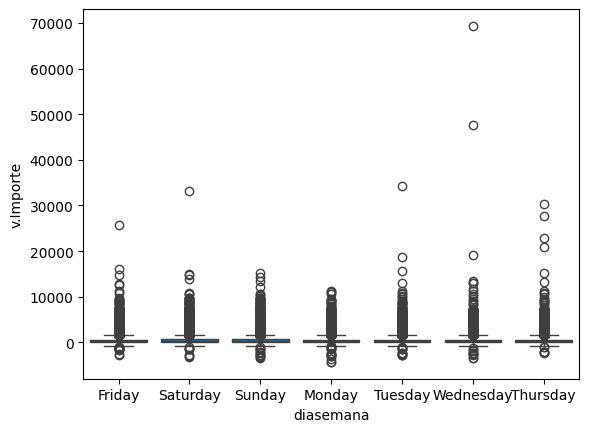

In [27]:
sns.boxplot( x='diasemana', y='v.Importe', data=ventas_df)

<Axes: xlabel='mes', ylabel='v.Importe'>

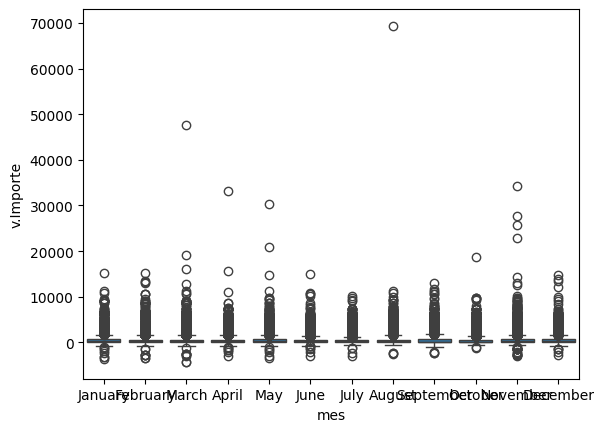

In [28]:
sns.boxplot( x='mes', y='v.Importe', data=ventas_df)

- Se puede ver que el año 2021 tiene mas datos presentados de venta.
- se puede ver cierta dominacion de venta para caegorias como tecnología y huawei.


## **Calsificación por comportamiento de venta**

Tenemos que quitar NaN para clasificaión ya que no permite NaN el algoritmo.

Recordamos cuales eran:

In [29]:
ventas_df.isna().sum()

Codigo         0
SKU            0
Cantidad       0
v.Importe      0
ItemName     686
Categoria    686
Familia      686
Uso          686
anio           0
mes            0
dia            0
diasemana      0
dtype: int64

In [30]:
ventas_df['ItemName'] = ventas_df['ItemName'].fillna('sn')
ventas_df['Categoria'] = ventas_df['Categoria'].fillna('sn')
ventas_df['Familia'] = ventas_df['Familia'].fillna('sn')
ventas_df['Uso'] = ventas_df['Uso'].fillna('sn')

comprobamos:

In [31]:
ventas_df.isna().sum()

Codigo       0
SKU          0
Cantidad     0
v.Importe    0
ItemName     0
Categoria    0
Familia      0
Uso          0
anio         0
mes          0
dia          0
diasemana    0
dtype: int64

In [32]:
ventas_por_producto = ventas_df.groupby('Categoria')['v.Importe'].sum()
ventas_por_producto


Categoria
ACCESORIOS    4.571869e+05
AUDIO         7.123398e+06
CARGA         5.010964e+05
HUAWEI        8.545392e+07
PROTECCION    2.138244e+05
SERVICIO      7.985554e+06
TECNOLOGIA    2.190727e+07
sn            1.134990e+05
Name: v.Importe, dtype: float64

**Haremos la clasifiación por método de k medias.**


In [33]:
clasificacion_venta = ventas_df[['v.Importe', 'Cantidad']]
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(clasificacion_venta)

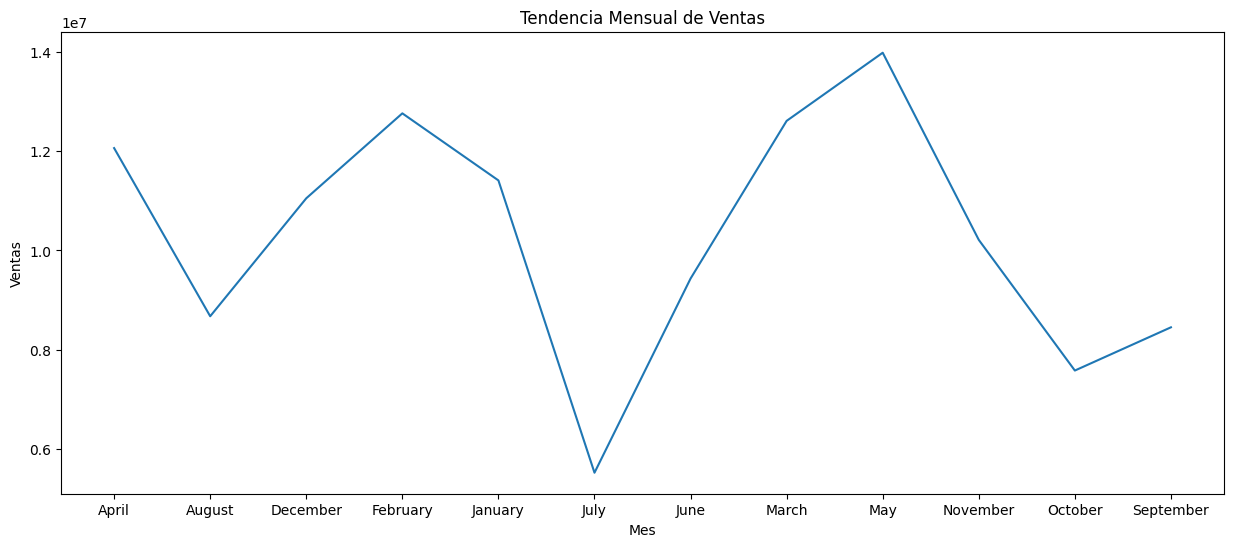

In [34]:
ventas_mensuales = ventas_df.groupby('mes')['v.Importe'].sum().reset_index()
plt.figure(figsize=(15, 6))  
sns.lineplot(x='mes', y='v.Importe', data=ventas_mensuales)

plt.title('Tendencia Mensual de Ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

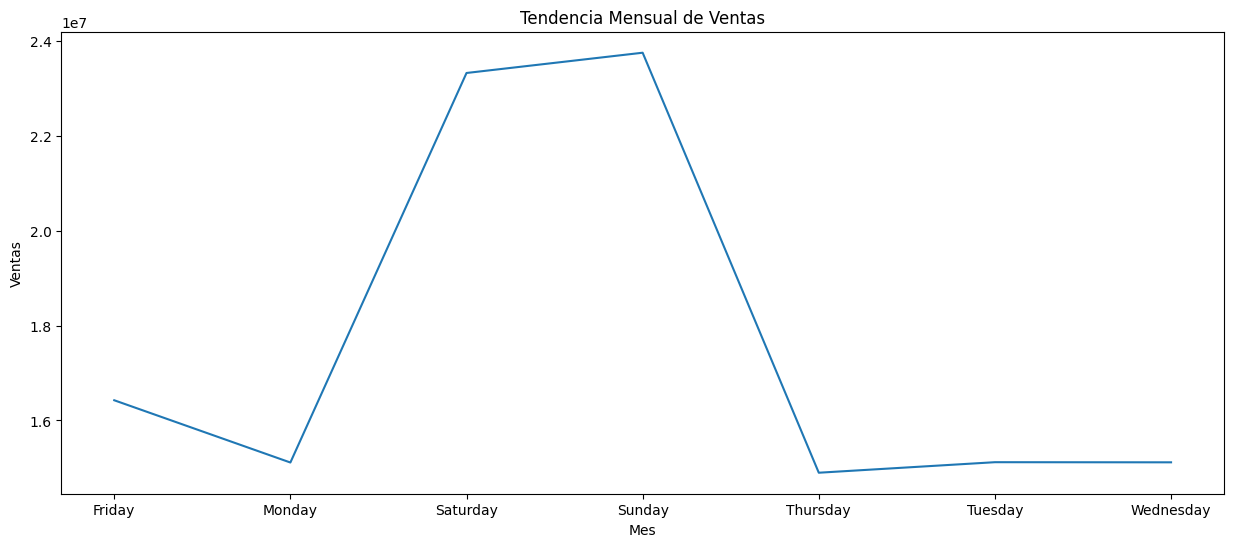

In [35]:
ventas_semanales = ventas_df.groupby('diasemana')['v.Importe'].sum().reset_index()
plt.figure(figsize=(15, 6)) 
sns.lineplot(x='diasemana', y='v.Importe', data=ventas_semanales)

plt.title('Tendencia Mensual de Ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas')

plt.show()

In [36]:

features = ventas_df[['v.Importe', 'Cantidad']]
features_normalized = (features - features.mean()) / features.std()

inertias = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features_normalized)
    inertias.append(kmeans.inertia_)

In [37]:
inertias

[440821.9999999865,
 300222.48977264867,
 194668.33953686216,
 169472.994249709,
 120233.7660530218,
 97013.16704756119,
 92310.94509254192,
 71264.20194402778,
 55345.9982389842,
 49209.1071489683]

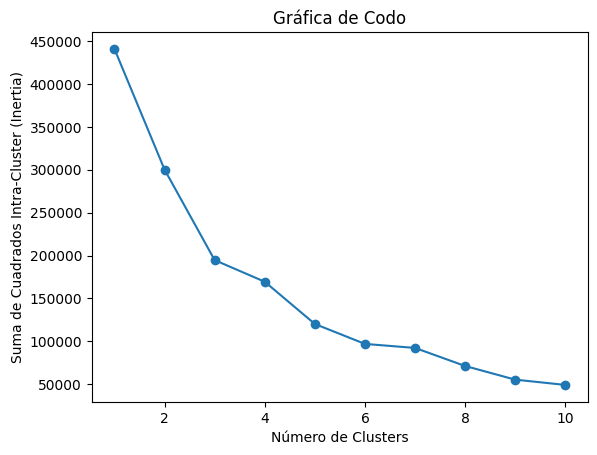

In [38]:
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Gráfica de Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Cuadrados Intra-Cluster (Inertia)')
plt.show()

In [39]:

features = ventas_df[['v.Importe', 'Cantidad']]


features_normalized = (features - features.mean()) / features.std()

kmeans = KMeans(n_clusters=4)  
ventas_df['cluster'] = kmeans.fit_predict(features_normalized)

In [40]:
segment_analysis = ventas_df.groupby('cluster')['v.Importe'].describe()
print(segment_analysis)

            count          mean           std           min           25%  \
cluster                                                                     
0         24972.0   2592.872661   1143.241686   1408.160624   1860.475049   
1        195408.0    299.475578    341.183113  -4270.928134     21.248183   
2             2.0  42123.077351  38483.336698  14911.249010  28517.163181   
3            30.0  13412.325305  11579.013264      0.000000   5280.600173   

                  50%           75%           max  
cluster                                            
0         2348.962788   2989.617490  25624.498654  
1          192.089520    480.170539   1452.322907  
2        42123.077351  55728.991522  69334.905693  
3        10844.878762  18233.280110  47554.231212  


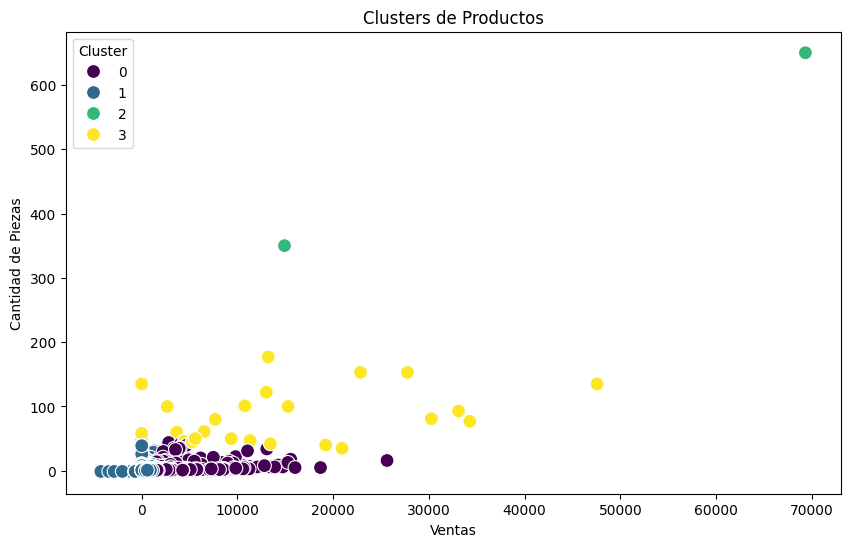

In [41]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='v.Importe', y='Cantidad', hue='cluster', data=ventas_df, palette='viridis', s=100)
plt.title('Clusters de Productos')
plt.xlabel('Ventas')
plt.ylabel('Cantidad de Piezas')
plt.legend(title='Cluster')
plt.show()

In [42]:
ventas_df.columns

Index(['Codigo', 'SKU', 'Cantidad', 'v.Importe', 'ItemName', 'Categoria',
       'Familia', 'Uso', 'anio', 'mes', 'dia', 'diasemana', 'cluster'],
      dtype='object')

## **Categorizacion por ventas y piezas **

In [43]:
ventas_df["VT"] = ventas_df["Cantidad"]*ventas_df["v.Importe"]

In [44]:
ventas_df

,Codigo,SKU,Cantidad,v.Importe,ItemName,Categoria,Familia,Uso,anio,mes,dia,diasemana,cluster,VT
0,710,HUAAUDBTFRBDSLTBCO,2,0.000000,AUDIFONOS BLUETOOTH HUAWEI FREEBUDS LITE BLANCO,AUDIO,NUEVO,AUDIFONOS,2021,January,1,Friday,1,0.000000
1,710,HUASMWGT2SPORTNGO,1,373.608827,SMARTWATCH HUAWEI GT 2 SPORT NEGRO,TECNOLOGIA,NUEVO,WEARABLES,2021,January,1,Friday,1,373.608827
2,710,HUATBTM5LIT64G,1,640.548183,TABLETA HUAWEI M5 LITE WIFI 64G GRIS,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,640.548183
3,710,HUATBTMTEPD10.464,1,683.258827,TABLET HUAWEI MATEPAD 10 4 64GB,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,683.258827
4,710,SERV-0000,0,1316.484407,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2021,January,1,Friday,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220407,746,HUASMWFIT2RJO,1,0.000000,SMARTWATCH HUAWEI FIT NEW ROJO,TECNOLOGIA,NUEVO,WEARABLES,2022,June,20,Monday,1,0.000000
220408,746,HUASMWFTELENGO,2,448.245624,SMARTWATCH HUAWEI FIT ELEGANT NEGRO,TECNOLOGIA,BLUETOOTH,WEARABLES,2022,June,20,Monday,1,896.491248
220409,746,SERV-0000,0,378.735392,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2022,June,20,Monday,1,0.000000
220410,746,THUANVA9SEAZL,1,907.487539,TELEFONO CELULAR HUAWEI NOVA 9SE AZUL,HUAWEI,NUEVO,TELEFONO,2022,June,20,Monday,1,907.487539


In [45]:

ventas_df['Porcentaje_Acumulado'] = (ventas_df['v.Importe'].cumsum() / ventas_df['v.Importe'].sum()) * 100

ventas_df['Categoria_ABC'] = pd.cut(ventas_df['Porcentaje_Acumulado'], bins=[0, 20, 70, 100], labels=['A', 'B', 'C'])

ventas_df

,Codigo,SKU,Cantidad,v.Importe,ItemName,Categoria,Familia,Uso,anio,mes,dia,diasemana,cluster,VT,Porcentaje_Acumulado,Categoria_ABC
0,710,HUAAUDBTFRBDSLTBCO,2,0.000000,AUDIFONOS BLUETOOTH HUAWEI FREEBUDS LITE BLANCO,AUDIO,NUEVO,AUDIFONOS,2021,January,1,Friday,1,0.000000,0.000000,NaN
1,710,HUASMWGT2SPORTNGO,1,373.608827,SMARTWATCH HUAWEI GT 2 SPORT NEGRO,TECNOLOGIA,NUEVO,WEARABLES,2021,January,1,Friday,1,373.608827,0.000302,A
2,710,HUATBTM5LIT64G,1,640.548183,TABLETA HUAWEI M5 LITE WIFI 64G GRIS,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,640.548183,0.000819,A
3,710,HUATBTMTEPD10.464,1,683.258827,TABLET HUAWEI MATEPAD 10 4 64GB,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,683.258827,0.001372,A
4,710,SERV-0000,0,1316.484407,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2021,January,1,Friday,1,0.000000,0.002435,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220407,746,HUASMWFIT2RJO,1,0.000000,SMARTWATCH HUAWEI FIT NEW ROJO,TECNOLOGIA,NUEVO,WEARABLES,2022,June,20,Monday,1,0.000000,99.998124,C
220408,746,HUASMWFTELENGO,2,448.245624,SMARTWATCH HUAWEI FIT ELEGANT NEGRO,TECNOLOGIA,BLUETOOTH,WEARABLES,2022,June,20,Monday,1,896.491248,99.998486,C
220409,746,SERV-0000,0,378.735392,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2022,June,20,Monday,1,0.000000,99.998792,C
220410,746,THUANVA9SEAZL,1,907.487539,TELEFONO CELULAR HUAWEI NOVA 9SE AZUL,HUAWEI,NUEVO,TELEFONO,2022,June,20,Monday,1,907.487539,99.999526,C


In [46]:
ventas_df.dropna()

,Codigo,SKU,Cantidad,v.Importe,ItemName,Categoria,Familia,Uso,anio,mes,dia,diasemana,cluster,VT,Porcentaje_Acumulado,Categoria_ABC
1,710,HUASMWGT2SPORTNGO,1,373.608827,SMARTWATCH HUAWEI GT 2 SPORT NEGRO,TECNOLOGIA,NUEVO,WEARABLES,2021,January,1,Friday,1,373.608827,0.000302,A
2,710,HUATBTM5LIT64G,1,640.548183,TABLETA HUAWEI M5 LITE WIFI 64G GRIS,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,640.548183,0.000819,A
3,710,HUATBTMTEPD10.464,1,683.258827,TABLET HUAWEI MATEPAD 10 4 64GB,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,683.258827,0.001372,A
4,710,SERV-0000,0,1316.484407,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2021,January,1,Friday,1,0.000000,0.002435,A
5,710,THUAP40PROPLTA,1,2669.289520,TELEFONO CELULAR HUAWEI P40 PRO PLATA,HUAWEI,NUEVO,TELEFONO,2021,January,1,Friday,0,2669.289520,0.004592,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220407,746,HUASMWFIT2RJO,1,0.000000,SMARTWATCH HUAWEI FIT NEW ROJO,TECNOLOGIA,NUEVO,WEARABLES,2022,June,20,Monday,1,0.000000,99.998124,C
220408,746,HUASMWFTELENGO,2,448.245624,SMARTWATCH HUAWEI FIT ELEGANT NEGRO,TECNOLOGIA,BLUETOOTH,WEARABLES,2022,June,20,Monday,1,896.491248,99.998486,C
220409,746,SERV-0000,0,378.735392,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2022,June,20,Monday,1,0.000000,99.998792,C
220410,746,THUANVA9SEAZL,1,907.487539,TELEFONO CELULAR HUAWEI NOVA 9SE AZUL,HUAWEI,NUEVO,TELEFONO,2022,June,20,Monday,1,907.487539,99.999526,C


In [47]:
ventas_df.dtypes

Codigo                     int64
SKU                       object
Cantidad                   int64
v.Importe                float64
ItemName                  object
Categoria                 object
Familia                   object
Uso                       object
anio                       int32
mes                       object
dia                        int32
diasemana                 object
cluster                    int32
VT                       float64
Porcentaje_Acumulado     float64
Categoria_ABC           category
dtype: object

In [48]:
ventas_df['Categoria_ABC'] = ventas_df['Categoria_ABC'].astype(str)

In [49]:
CAT = "Categoria_ABC"
CAT_LIST = list(ventas_df[CAT].unique())
CAT_LIST.sort()



<Figure size 6000x6000 with 0 Axes>

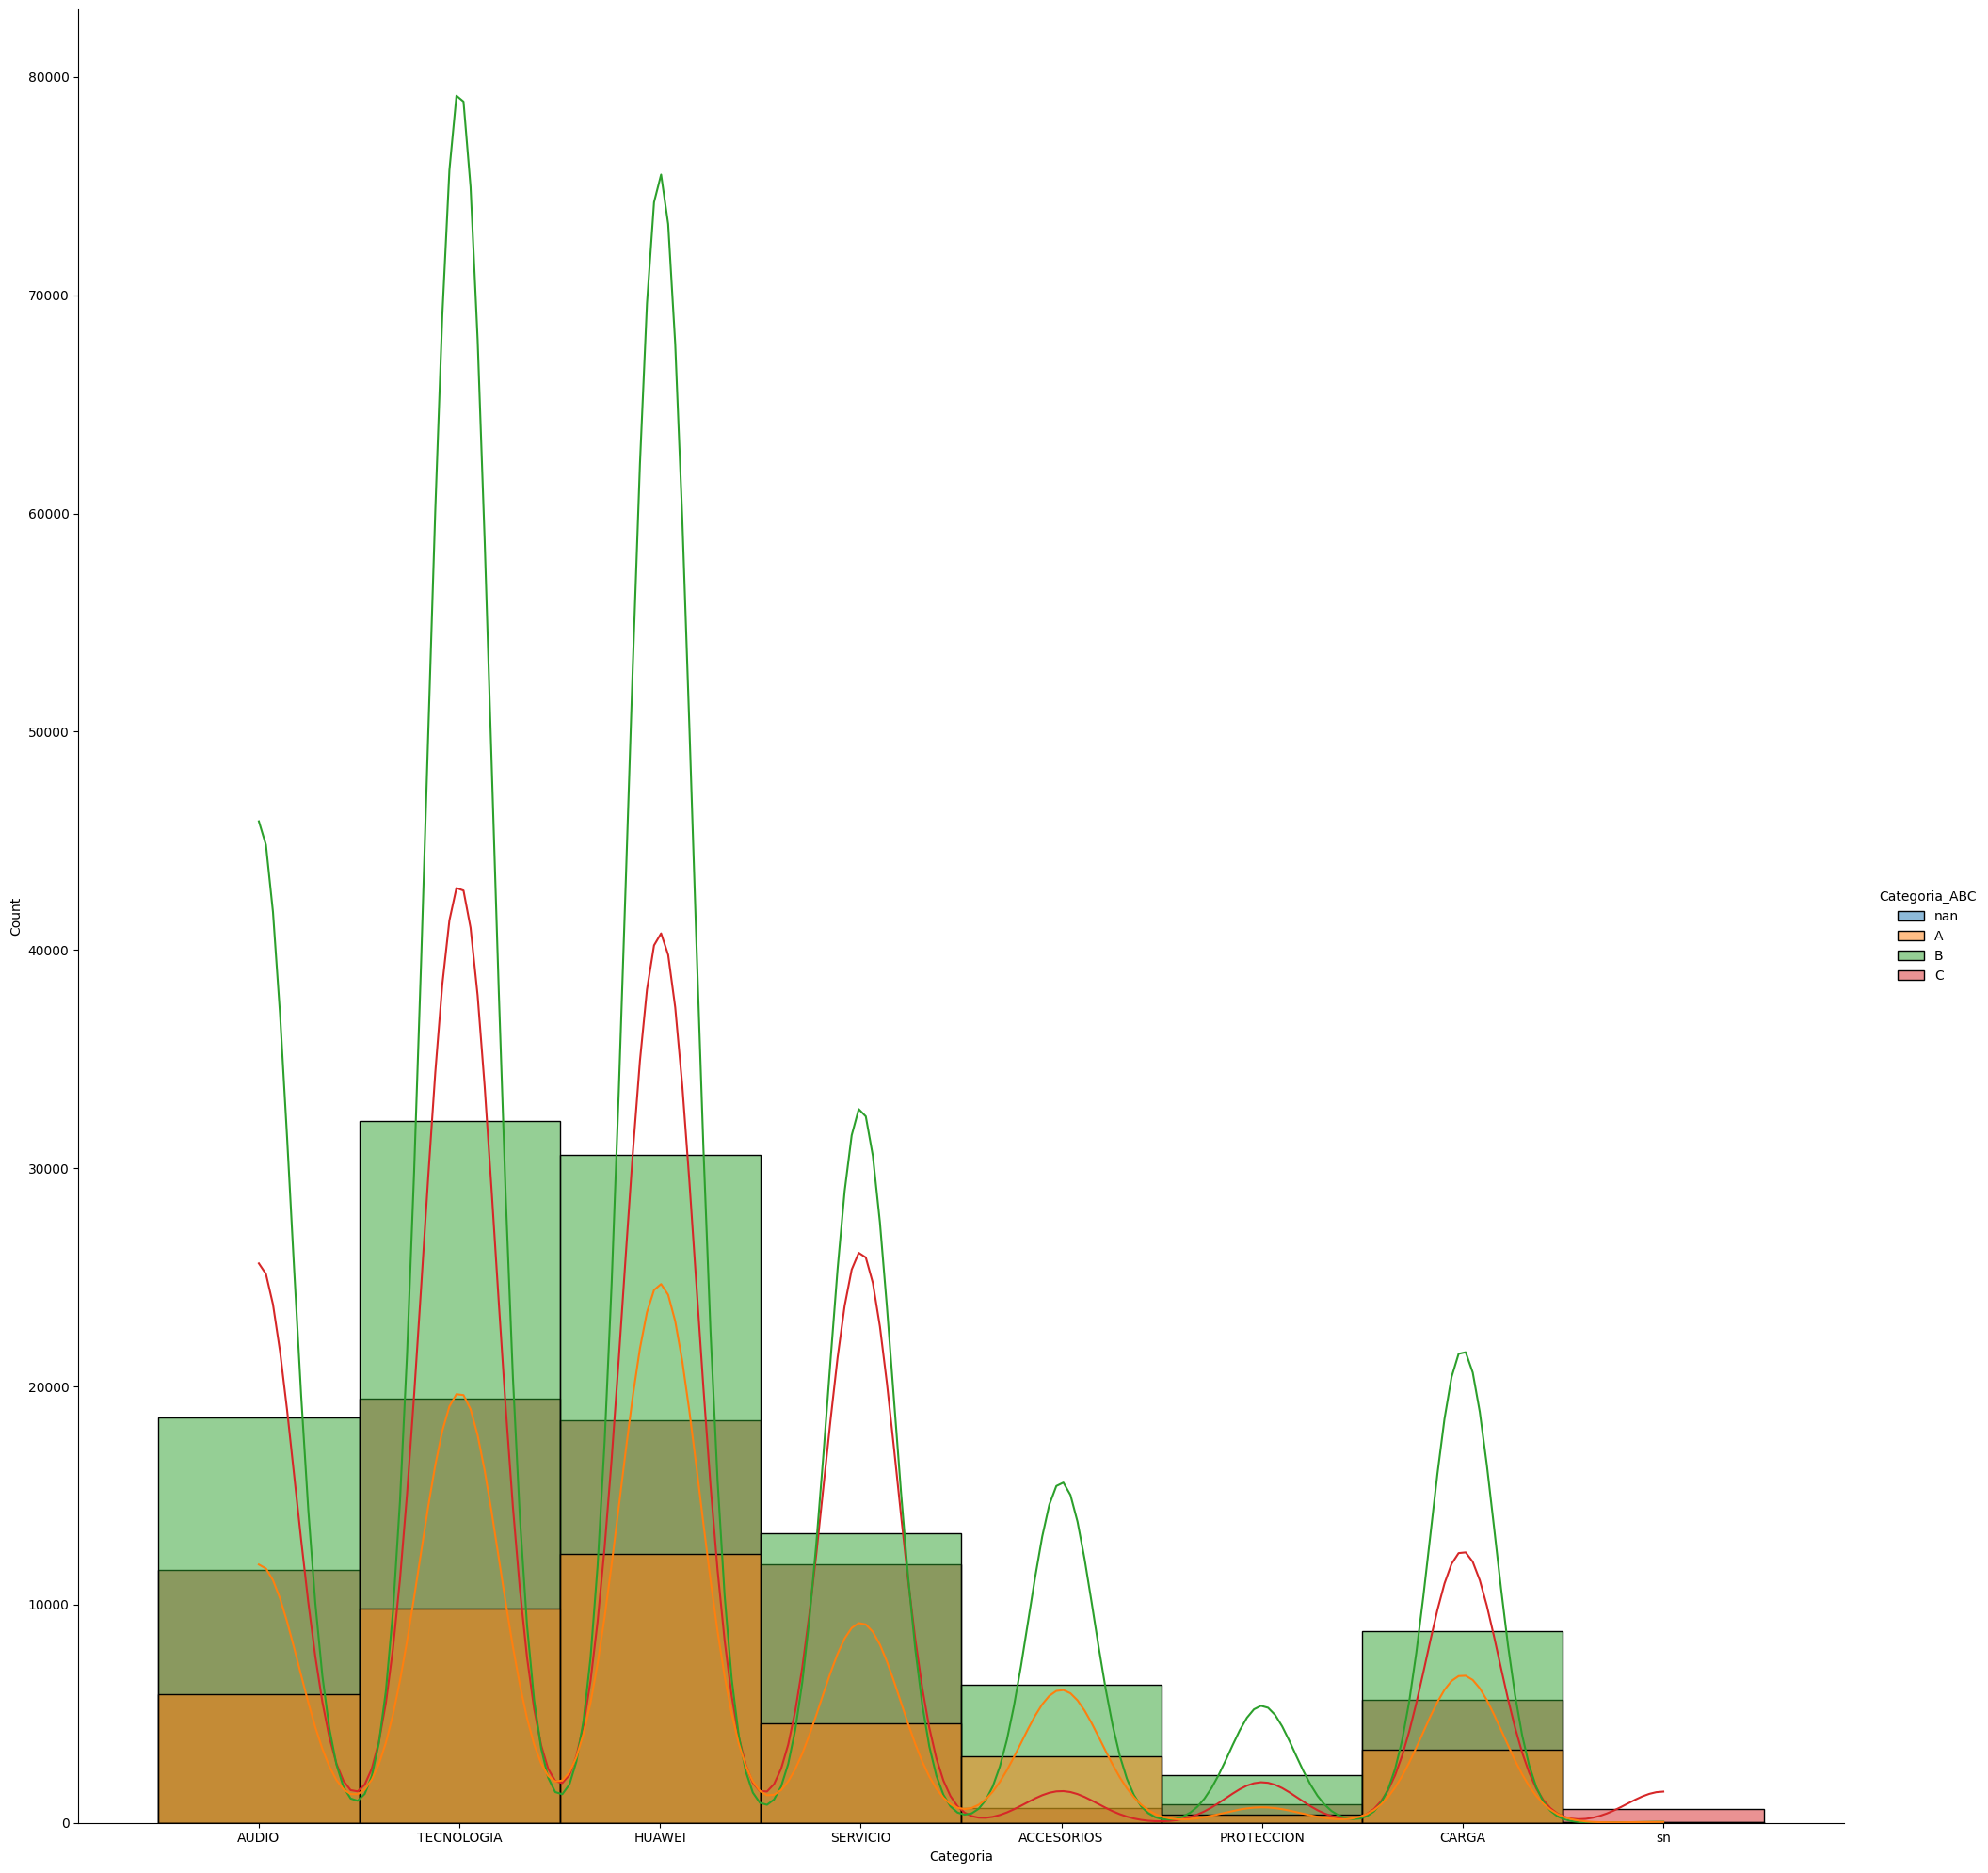

In [50]:


plt.figure(figsize=(60, 60))
sns.displot(ventas_df, x="Categoria", hue="Categoria_ABC", kde=True, height=20)  # Ajusta el valor de height según tus necesidades
plt.show()


In [51]:
ventas_df['Categoria'] = ventas_df['Categoria'].astype(str)

In [52]:
X = ventas_df

y = ventas_df['Categoria_ABC']

In [53]:


le = LabelEncoder()

X['Categoria_ABC'] = le.fit_transform(X['Categoria_ABC'])

y = le.transform(y)

In [54]:
X = X[["v.Importe","Cantidad","Categoria_ABC"]]

In [55]:
X

,v.Importe,Cantidad,Categoria_ABC
0,0.000000,2,3
1,373.608827,1,0
2,640.548183,1,0
3,683.258827,1,0
4,1316.484407,0,0
...,...,...,...
220407,0.000000,1,2
220408,448.245624,2,2
220409,378.735392,0,2
220410,907.487539,1,2


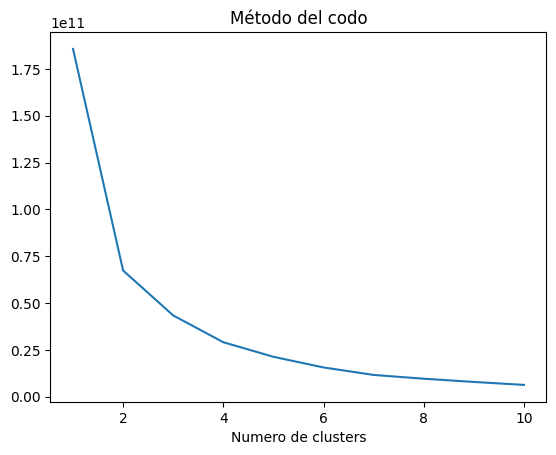

In [56]:

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('')
plt.show()

In [57]:

df_clasificacion=X
km=3

modelo_km = KMeans(n_clusters=km, random_state=42, n_init="auto")
modelo_km.fit(X)


df_clasificacion["etiqueta_km"] = modelo_km.labels_
df_clasificacion["etiqueta_km"] = df_clasificacion["etiqueta_km"].astype(str)


C:\Users\tontu\AppData\Local\Temp\ipykernel_22172\305119973.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clasificacion["etiqueta_km"] = modelo_km.labels_
C:\Users\tontu\AppData\Local\Temp\ipykernel_22172\305119973.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clasificacion["etiqueta_km"] = df_clasificacion["etiqueta_km"].astype(str)


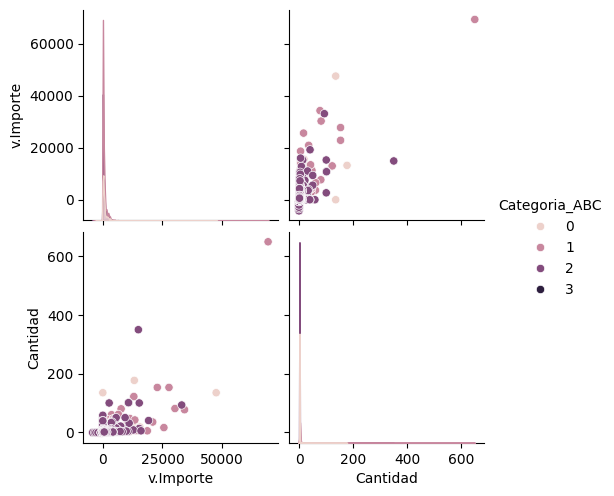

In [58]:
sns.pairplot(df_clasificacion,hue="Categoria_ABC")

## **Clasificacion por Tiendas**

In [59]:

X = ventas_df


X = X[["v.Importe","Cantidad","Codigo"]]


In [60]:
X

,v.Importe,Cantidad,Codigo
0,0.000000,2,710
1,373.608827,1,710
2,640.548183,1,710
3,683.258827,1,710
4,1316.484407,0,710
...,...,...,...
220407,0.000000,1,746
220408,448.245624,2,746
220409,378.735392,0,746
220410,907.487539,1,746


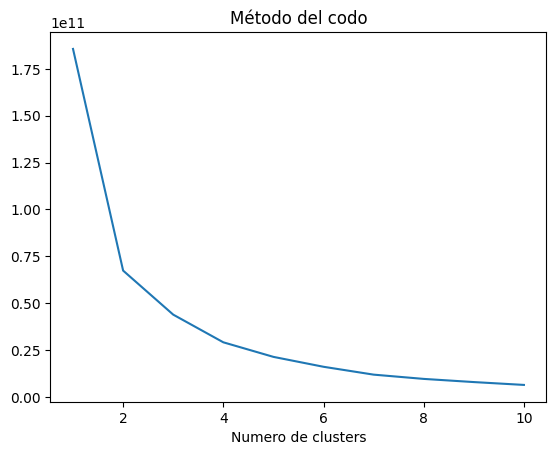

In [61]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('')
plt.show()

In [62]:
from sklearn.cluster import KMeans
df_clasificacion=X
km=2

modelo_km = KMeans(n_clusters=km, random_state=42, n_init="auto")
modelo_km.fit(X)

df_clasificacion["etiqueta_km"] = modelo_km.labels_
df_clasificacion["etiqueta_km"] = df_clasificacion["etiqueta_km"].astype(str)


C:\Users\tontu\AppData\Local\Temp\ipykernel_22172\2303916295.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clasificacion["etiqueta_km"] = modelo_km.labels_
C:\Users\tontu\AppData\Local\Temp\ipykernel_22172\2303916295.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clasificacion["etiqueta_km"] = df_clasificacion["etiqueta_km"].astype(str)


In [63]:
df_clasificacion

,v.Importe,Cantidad,Codigo,etiqueta_km
0,0.000000,2,710,1
1,373.608827,1,710,1
2,640.548183,1,710,1
3,683.258827,1,710,1
4,1316.484407,0,710,1
...,...,...,...,...
220407,0.000000,1,746,1
220408,448.245624,2,746,1
220409,378.735392,0,746,1
220410,907.487539,1,746,1


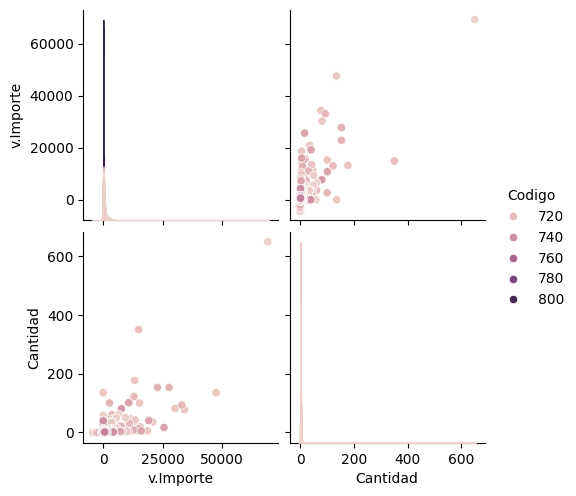

In [64]:
sns.pairplot(df_clasificacion,hue="Codigo")

## **¿Qué tendencias identificas conforme a la venta?**

- La venta tiene cierta periodicidad conforme a las semanas.
- En cuanto a productos se puede separa en 3 tipos de grupo, sin embargo no no están muy bien formados.
- Para las tiendas podemos ver algunas muy despegadas de otras sin embargo les cuesta separarse del todo.

## **Modelo de prediccion TBATS**

In [65]:
ventas_dftrain = ventas_df[ventas_df["anio"]==2021]


In [66]:
ventas_dfreal = ventas_df[ventas_df["anio"]==2022]

In [67]:
ventas_df.columns

Index(['Codigo', 'SKU', 'Cantidad', 'v.Importe', 'ItemName', 'Categoria',
       'Familia', 'Uso', 'anio', 'mes', 'dia', 'diasemana', 'cluster', 'VT',
       'Porcentaje_Acumulado', 'Categoria_ABC'],
      dtype='object')

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

datos = pd.get_dummies(ventas_df, columns=['Categoria', 'anio', 'mes','dia'])

ventas_df


,Codigo,SKU,Cantidad,v.Importe,ItemName,Categoria,Familia,Uso,anio,mes,dia,diasemana,cluster,VT,Porcentaje_Acumulado,Categoria_ABC
0,710,HUAAUDBTFRBDSLTBCO,2,0.000000,AUDIFONOS BLUETOOTH HUAWEI FREEBUDS LITE BLANCO,AUDIO,NUEVO,AUDIFONOS,2021,January,1,Friday,1,0.000000,0.000000,3
1,710,HUASMWGT2SPORTNGO,1,373.608827,SMARTWATCH HUAWEI GT 2 SPORT NEGRO,TECNOLOGIA,NUEVO,WEARABLES,2021,January,1,Friday,1,373.608827,0.000302,0
2,710,HUATBTM5LIT64G,1,640.548183,TABLETA HUAWEI M5 LITE WIFI 64G GRIS,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,640.548183,0.000819,0
3,710,HUATBTMTEPD10.464,1,683.258827,TABLET HUAWEI MATEPAD 10 4 64GB,HUAWEI,NUEVO,TABLET,2021,January,1,Friday,1,683.258827,0.001372,0
4,710,SERV-0000,0,1316.484407,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2021,January,1,Friday,1,0.000000,0.002435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220407,746,HUASMWFIT2RJO,1,0.000000,SMARTWATCH HUAWEI FIT NEW ROJO,TECNOLOGIA,NUEVO,WEARABLES,2022,June,20,Monday,1,0.000000,99.998124,2
220408,746,HUASMWFTELENGO,2,448.245624,SMARTWATCH HUAWEI FIT ELEGANT NEGRO,TECNOLOGIA,BLUETOOTH,WEARABLES,2022,June,20,Monday,1,896.491248,99.998486,2
220409,746,SERV-0000,0,378.735392,ARTICULO DE SERVICIO,SERVICIO,REFACCION,REPARACION,2022,June,20,Monday,1,0.000000,99.998792,2
220410,746,THUANVA9SEAZL,1,907.487539,TELEFONO CELULAR HUAWEI NOVA 9SE AZUL,HUAWEI,NUEVO,TELEFONO,2022,June,20,Monday,1,907.487539,99.999526,2


In [69]:
ventas_df.dtypes

Codigo                    int64
SKU                      object
Cantidad                  int64
v.Importe               float64
ItemName                 object
Categoria                object
Familia                  object
Uso                      object
anio                      int32
mes                      object
dia                       int32
diasemana                object
cluster                   int32
VT                      float64
Porcentaje_Acumulado    float64
Categoria_ABC             int32
dtype: object

In [72]:
df_final = pd.read_csv('ventas_hw.csv')

In [74]:


df_final['FechaArchivo'] = pd.to_datetime(df_final['FechaArchivo'])



In [75]:
df_final['año'] = df_final['FechaArchivo'].dt.year
df_final['mes'] = df_final['FechaArchivo'].dt.month
df_final['dia'] = df_final['FechaArchivo'].dt.day

In [78]:
df_final = pd.get_dummies(df_final, columns=['SKU', 'ItemName','Categoria', 'Familia','Uso'])


In [79]:
X = df_final.drop(['v.Importe', 'FechaArchivo'], axis=1)  # Excluir la variable objetivo y 'fecha'
y = df_final['v.Importe']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [82]:
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_normalized, y_train)
X_test_selected = selector.transform(X_test_normalized)

In [83]:
modelo_rf = RandomForestRegressor()

In [84]:
parametros_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Random Forest: Error Cuadrático Medio = 45196.64152735806


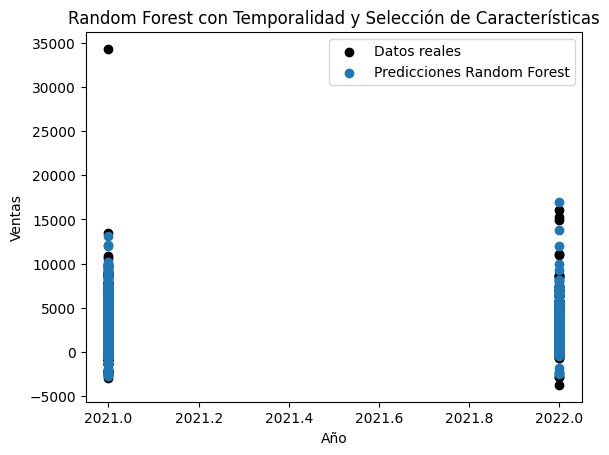

In [89]:
modelo_rf.fit(X_train_selected, y_train)
predicciones_rf = modelo_rf.predict(X_test_selected)
error_cuadratico_medio_rf = mean_squared_error(y_test, predicciones_rf)
print(f'Random Forest: Error Cuadrático Medio = {error_cuadratico_medio_rf}')

plt.scatter(X_test['año'], y_test, color='black', label='Datos reales')
plt.scatter(X_test['año'], predicciones_rf, label='Predicciones Random Forest')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.legend()
plt.title('Random Forest con Temporalidad y Selección de Características')
plt.show()

In [90]:
X_test

,Codigo,Cantidad,año,mes,dia,SKU_AFHUATBTMTEPAZLT8RAP,SKU_ATTSIMTRIOIUS100HUA,SKU_AUDHUABTFREEBUDS3BCO,SKU_AUDHUABTFREEBUDS3NGO,SKU_CHPTELAMIGOEXPTRIGUA,...,Uso_REPARACION,Uso_ROUTER,Uso_SELFIE,Uso_SIM,Uso_SOPORTE,Uso_TABLET,Uso_TECLADO,Uso_TELEFONO,Uso_TIEMPO AIRE,Uso_WEARABLES
156655,729,1,2022,1,21,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
144203,731,4,2021,12,23,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
120157,736,1,2021,11,14,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
166783,733,1,2022,2,13,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
188757,715,1,2022,4,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198265,716,1,2022,5,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
169813,712,1,2022,2,20,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197779,722,1,2022,4,30,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
135289,725,1,2021,12,12,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
